<a href="https://colab.research.google.com/github/abs790502/HW/blob/main/Australian_Vehicle_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 掛載GOOGLE DRIVE

In [1]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/python/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '/Google Drive/python/'

Mounted at /content/drive


## Import API

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lb = LabelEncoder()

## 讀取GOOGLE DRIVE 中的csv檔

In [87]:
df = pd.read_csv("/content/drive/My Drive/python/Australian Vehicle Prices/Australian Vehicle Prices.csv")
print(df.head())

           Brand    Year   Model               Car/Suv  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1             MG  2022.0     MG3             Hatchback   
2            BMW  2022.0    430I                 Coupe   
3  Mercedes-Benz  2011.0    E500                 Coupe   
4        Renault  2022.0  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Intens      USED    Automatic   

         Engine DriveType  FuelType FuelConsumption Kilometres   ColourExtInt  \
0  4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km       5595  White / Black   
1  4 cyl, 1.5 L     Front   Premium  6.7 L / 100 km         16

##資料清洗

In [88]:
df.info()   #最多有16733 比樣本
df.isnull().sum() #可以看到每行都有缺失值，其中Doors,Seats,Location 缺少最多

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

In [89]:
df.dropna(inplace=True) #移除缺失值
df.info()
#要注意比原始資料少了12.8% ，此次分析不需要考慮Doors,Seats,Location 故先把這幾行的空格填入虛擬(virtual)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14586 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14586 non-null  object 
 1   Year               14586 non-null  float64
 2   Model              14586 non-null  object 
 3   Car/Suv            14586 non-null  object 
 4   Title              14586 non-null  object 
 5   UsedOrNew          14586 non-null  object 
 6   Transmission       14586 non-null  object 
 7   Engine             14586 non-null  object 
 8   DriveType          14586 non-null  object 
 9   FuelType           14586 non-null  object 
 10  FuelConsumption    14586 non-null  object 
 11  Kilometres         14586 non-null  object 
 12  ColourExtInt       14586 non-null  object 
 13  Location           14586 non-null  object 
 14  CylindersinEngine  14586 non-null  object 
 15  BodyType           14586 non-null  object 
 16  Doors              145

## 新的DataFrame 進行

In [90]:
df['Location'].fillna('virtual', inplace=True)
df['Doors'].fillna('virtual', inplace=True)
df['Seats'].fillna('virtual', inplace=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') #price 欄位中有'POA' 故先把無效資訊轉成空值
df['Year'] = df['Year'].fillna(0).astype(int)
df.dropna(inplace=True)
df.info()
# df.info()   還有16389 比樣本 比原始資料少2% ，故將以此整理後資料進行數據分析

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14551 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14551 non-null  object 
 1   Year               14551 non-null  int64  
 2   Model              14551 non-null  object 
 3   Car/Suv            14551 non-null  object 
 4   Title              14551 non-null  object 
 5   UsedOrNew          14551 non-null  object 
 6   Transmission       14551 non-null  object 
 7   Engine             14551 non-null  object 
 8   DriveType          14551 non-null  object 
 9   FuelType           14551 non-null  object 
 10  FuelConsumption    14551 non-null  object 
 11  Kilometres         14551 non-null  object 
 12  ColourExtInt       14551 non-null  object 
 13  Location           14551 non-null  object 
 14  CylindersinEngine  14551 non-null  object 
 15  BodyType           14551 non-null  object 
 16  Doors              145

In [91]:
brand_count= df['Brand'].value_counts() #各品牌的銷售數量
total_brand= df['Brand'].nunique() #共有多少品牌
year_count= df['Year'].value_counts() #各年份銷售量

df_year_count = year_count.reset_index()
df_year_count.columns = ['Year','Count']

top_ten = brand_count.head(10).reset_index() #前10大銷售量品牌與銷售數,存成新的dataframe
top_ten.columns= ['Brand','Count'] #轉換成新的dataframe['Brand' & 'Count']

filter_year_20 = df[df['Year'] >2009]#把年份縮短到近20年
fueltype_year_20 = filter_year_20['FuelType'].value_counts() # 發現一個Fueltype為'-'
df_fueltype_year_20 = filter_year_20[filter_year_20['FuelType'] != '-']  # 先將'-'移除

#近10年總銷售額最高的前5大車廠的FuelType分類
df_filter_year_ten = df[df['Year'] >2002] #近10年
df_filter_year_ten['FuelType'] = np.where(df_filter_year_ten['FuelType'].isin(['Hybrid', 'Unleaded','Electric']), df_filter_year_ten['FuelType'], 'Other')#fueltype分類
df_fueltype_filter = df_filter_year_ten.query("FuelType != 'Other'") #other太多了，只看油電，無鉛，純電
top_10_sales = df_filter_year_ten.groupby('Brand')['Price'].sum().nlargest(5).index #看前10大銷售品牌的
df_top_10_year_sales = df_fueltype_filter[df_fueltype_filter['Brand'].isin(top_10_sales)]


<ipython-input-91-a033d5b7b2b7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_year_ten['FuelType'] = np.where(df_filter_year_ten['FuelType'].isin(['Hybrid', 'Unleaded','Electric']), df_filter_year_ten['FuelType'], 'Other')#fueltype分類


## Heatmap

    Brand  Year  Model  UsedOrNew  Car/Suv  Transmission  DriveType  FuelType  \
11      4  2018     49          2        3             1          3         2   
19      0  2014     40          2       11             1          2         2   
21      0  2013     40          2       11             1          2         2   
26      4  2005     23          2       30             1          2         2   
28      1  2011     55          2       30             1          2         2   

    BodyType    Price  
11         0  41999.0  
19         3  12400.0  
21         3  11999.0  
26         6   8499.0  
28         6  12990.0  


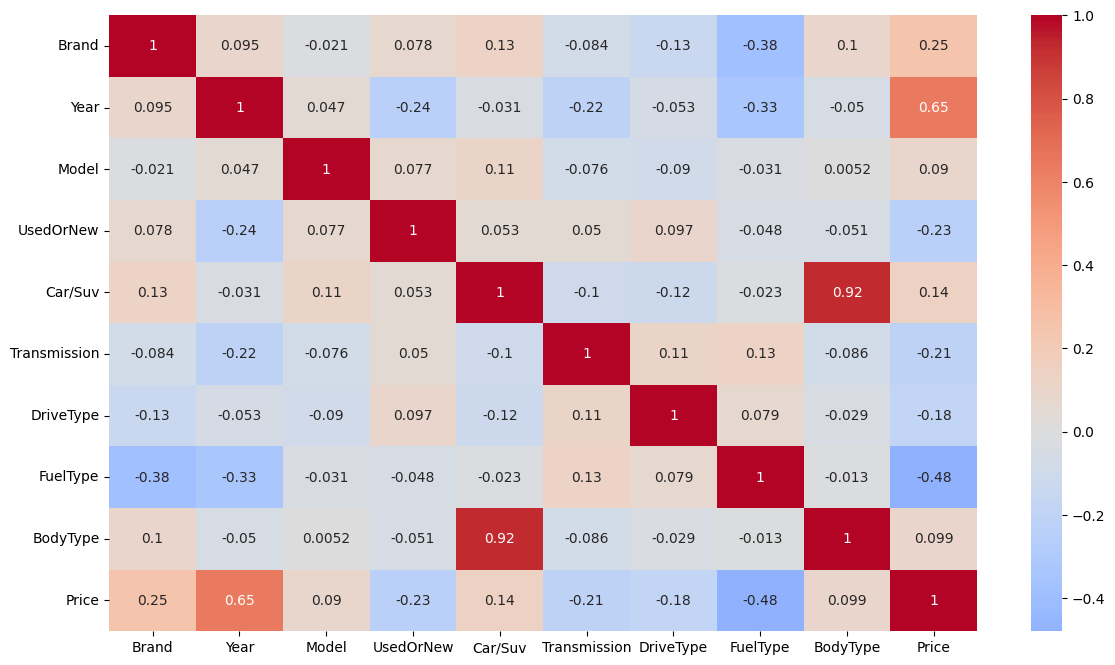

In [118]:
#保留近10年的['Brand', 'Year', 'Model','UsedOrNew', 'Car/Suv', 'Transmission', 'DriveType' , 'FuelType', 'BodyType', 'Price'] 做heatmap
df_10_year = df_top_10_year_sales.loc[:, ['Brand', 'Year', 'Model', 'UsedOrNew', 'Car/Suv', 'Transmission', 'DriveType' , 'FuelType', 'BodyType', 'Price']]

df_10_year['Brand'] = lb.fit_transform(df_10_year['Brand'])
df_10_year['Model'] = lb.fit_transform(df_10_year['Model'])
df_10_year['Car/Suv'] = lb.fit_transform(df_10_year['Car/Suv'])
df_10_year['UsedOrNew'] = lb.fit_transform(df_10_year['UsedOrNew'])
df_10_year['Transmission'] = lb.fit_transform(df_10_year['Transmission'])
df_10_year['DriveType'] = lb.fit_transform(df_10_year['DriveType'])
df_10_year['FuelType'] = lb.fit_transform(df_10_year['FuelType'])
df_10_year['BodyType'] = lb.fit_transform(df_10_year['BodyType'])

print(df_10_year.head())

corr_matrix=df_10_year.corr()
plt.figure(1, figsize=(14,8))
sns.heatmap(corr_matrix,center=0,cmap = 'coolwarm', annot=True)
plt.show()


In [9]:
## 散點圖

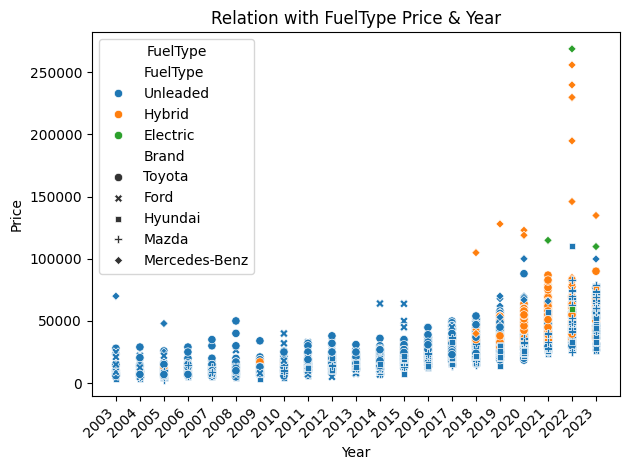

In [96]:
sns.scatterplot(x='Year', y='Price', hue='FuelType', style='Brand', data=df_top_10_year_sales) #散點圖
plt.title('Relation with FuelType Price & Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(np.arange(min(df_top_10_year_sales['Year']), max(df_top_10_year_sales['Year'])+1, 1.0),rotation=45, ha='right')
plt.legend(title='FuelType')
plt.tight_layout()
plt.show()

## 盒鬚圖

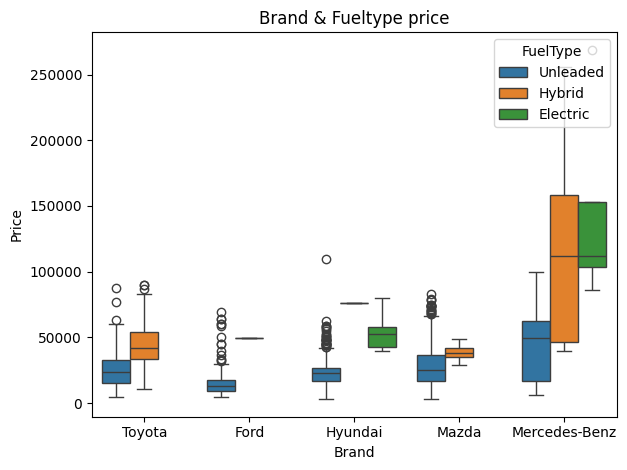

In [11]:
sns.boxplot(x='Brand', y='Price', hue='FuelType', data=df_top_10_year_sales) #合鬚圖
plt.title('Brand & Fueltype price')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.legend(title='FuelType', loc='upper right')
plt.tight_layout()
plt.show()

## 長條圖

<ipython-input-12-29002c1404fa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Count', data=top_ten, palette='viridis') #長條圖


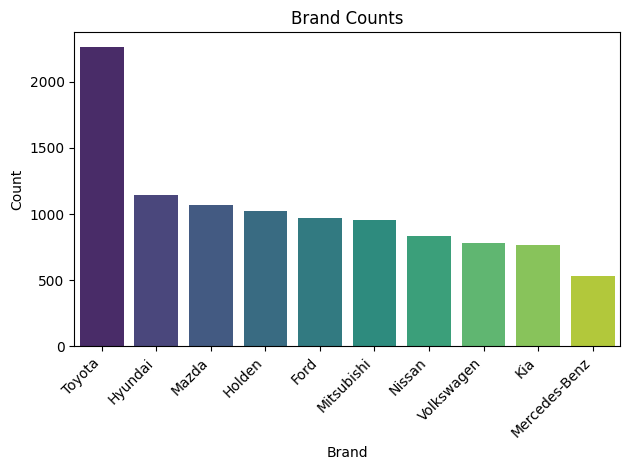

In [12]:
sns.barplot(x='Brand', y='Count', data=top_ten, palette='viridis') #長條圖
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##計數長條圖

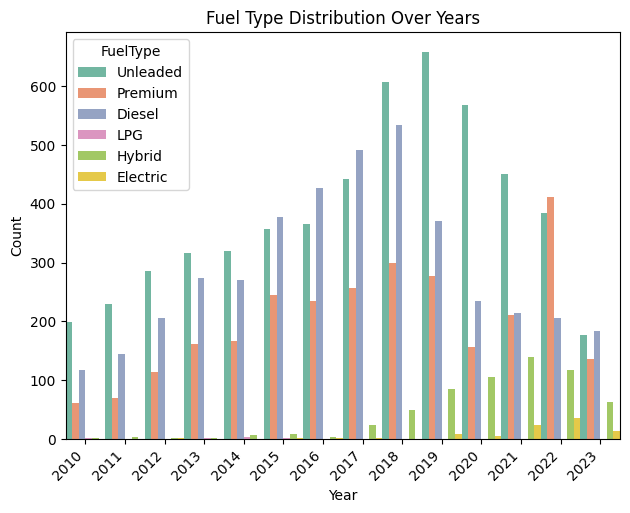

In [13]:
sns.countplot(x='Year', hue='FuelType', data=df_fueltype_year_20, palette='Set2', width=1) #計數長條圖
plt.tight_layout()
plt.title('Fuel Type Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## ndf 轉換為數字的df,移除缺失值太多欄位

In [14]:
## 把所有資料轉成數字

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14551 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14551 non-null  object 
 1   Year               14551 non-null  int64  
 2   Model              14551 non-null  object 
 3   Car/Suv            14551 non-null  object 
 4   Title              14551 non-null  object 
 5   UsedOrNew          14551 non-null  object 
 6   Transmission       14551 non-null  object 
 7   Engine             14551 non-null  object 
 8   DriveType          14551 non-null  object 
 9   FuelType           14551 non-null  object 
 10  FuelConsumption    14551 non-null  object 
 11  Kilometres         14551 non-null  object 
 12  ColourExtInt       14551 non-null  object 
 13  Location           14551 non-null  object 
 14  CylindersinEngine  14551 non-null  object 
 15  BodyType           14551 non-null  object 
 16  Doors              145

In [16]:
#此次分析不需要考慮Doors,Seats,Location
ndf = df.loc[:, ['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew', 'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption', 'Kilometres', 'ColourExtInt', 'BodyType', 'CylindersinEngine', 'Price']]


ndf['Brand'] = lb.fit_transform(ndf['Brand'])
ndf['Model'] = lb.fit_transform(ndf['Model'])
ndf['Car/Suv'] = lb.fit_transform(ndf['Car/Suv'])
ndf['Title'] = lb.fit_transform(ndf['Title'])
ndf['UsedOrNew'] = lb.fit_transform(ndf['UsedOrNew'])
ndf['Transmission'] = lb.fit_transform(ndf['Transmission'])
ndf['Engine'] = lb.fit_transform(ndf['Engine'])
ndf['DriveType'] = lb.fit_transform(ndf['DriveType'])
ndf['FuelType'] = lb.fit_transform(ndf['FuelType'])
ndf['FuelConsumption'] = lb.fit_transform(ndf['FuelConsumption'])
ndf['Kilometres'] = lb.fit_transform(ndf['Kilometres'])
ndf['ColourExtInt'] = lb.fit_transform(ndf['ColourExtInt'])
ndf['BodyType'] = lb.fit_transform(ndf['BodyType'])
ndf['CylindersinEngine'] = lb.fit_transform(ndf['CylindersinEngine'])



print(ndf.info())
print(ndf.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14551 entries, 0 to 16733
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14551 non-null  int64  
 1   Year               14551 non-null  int64  
 2   Model              14551 non-null  int64  
 3   Car/Suv            14551 non-null  int64  
 4   Title              14551 non-null  int64  
 5   UsedOrNew          14551 non-null  int64  
 6   Transmission       14551 non-null  int64  
 7   Engine             14551 non-null  int64  
 8   DriveType          14551 non-null  int64  
 9   FuelType           14551 non-null  int64  
 10  FuelConsumption    14551 non-null  int64  
 11  Kilometres         14551 non-null  int64  
 12  ColourExtInt       14551 non-null  int64  
 13  BodyType           14551 non-null  int64  
 14  CylindersinEngine  14551 non-null  int64  
 15  Price              14551 non-null  float64
dtypes: float64(1), int64(1

In [17]:
nb = df['Brand'].unique()
print(nb)
# df['Brand'] = lb.fit_transform(df['Brand'])
# nbq = df['Brand'].unique()
# print(nbq)

# original_data = lb.inverse_transform(df['Brand'])

['Ssangyong' 'MG' 'BMW' 'Mercedes-Benz' 'Renault' 'Land' 'Nissan' 'Toyota'
 'Honda' 'Volkswagen' 'Ford' 'Mitsubishi' 'Subaru' 'Hyundai' 'Jeep'
 'Volvo' 'Mazda' 'Abarth' 'Holden' 'Audi' 'Kia' 'Mini' 'Suzuki' 'Porsche'
 'Peugeot' 'Isuzu' 'Lexus' 'Jaguar' 'Rolls-Royce' 'Skoda' 'Fiat' 'Haval'
 'Citroen' 'LDV' 'HSV' 'Foton' 'Mahindra' 'Maserati' 'GWM' 'Ram' 'Tesla'
 'Alfa' 'Genesis' 'Dodge' 'Chrysler' 'Great' 'Opel' 'Bentley' 'Ferrari'
 'Cupra' 'Chevrolet' 'Lamborghini' 'FPV' 'McLaren' 'Iveco' 'Chery'
 'Infiniti' 'BYD' 'Tata' 'Aston' 'Daewoo' 'Saab' 'Proton' 'Smart']


In [18]:
ndf.describe()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,BodyType,CylindersinEngine,Price
count,14551.00000,14551.000000,14551.000000,14551.000000,14551.000000,14551.000000,14551.000000,14551.000000,14551.000000,14551.000000,14551.000000,14551.000000,14551.000000,14551.000000,14551.000000,14551.000000
mean,38.76792,2016.224040,354.619614,167.253453,3882.573775,1.898976,1.114631,33.873892,1.646141,4.716789,110.794035,6336.220122,357.045564,5.815958,5.364717,34980.246306
std,17.15138,4.920199,177.089937,56.489740,1955.073455,0.387387,0.325206,14.692883,1.212336,2.670649,39.543766,3783.255729,202.557436,1.960804,0.994053,29031.113506
min,0.00000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000
25%,26.00000,2013.000000,195.000000,136.000000,2280.500000,2.000000,1.000000,27.000000,1.000000,1.000000,110.000000,3044.500000,206.000000,6.000000,5.000000,18990.000000
50%,40.00000,2017.000000,350.000000,188.000000,4038.000000,2.000000,1.000000,29.000000,2.000000,6.000000,124.000000,6252.000000,427.000000,6.000000,5.000000,28990.000000
75%,57.00000,2020.000000,509.000000,189.000000,5503.000000,2.000000,1.000000,35.000000,2.000000,7.000000,133.000000,9606.500000,520.000000,7.000000,5.000000,42755.000000
max,63.00000,2023.000000,645.000000,240.000000,7086.000000,2.000000,2.000000,90.000000,4.000000,7.000000,151.000000,12970.000000,711.000000,9.000000,8.000000,649880.000000


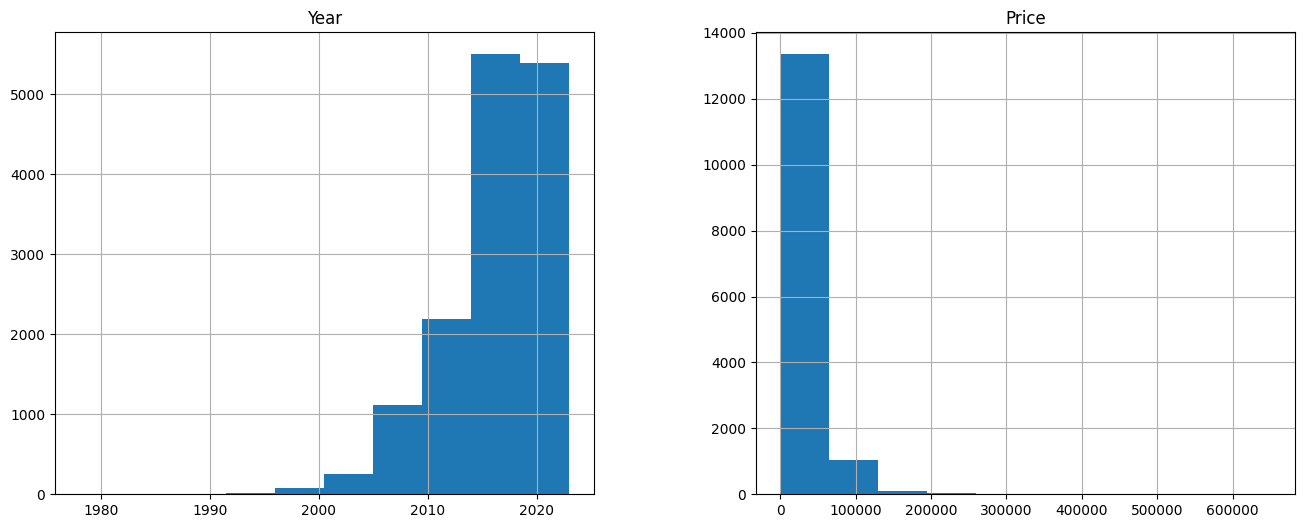

In [19]:
df.hist(bins = 10 , figsize=(16,6))
plt.show()

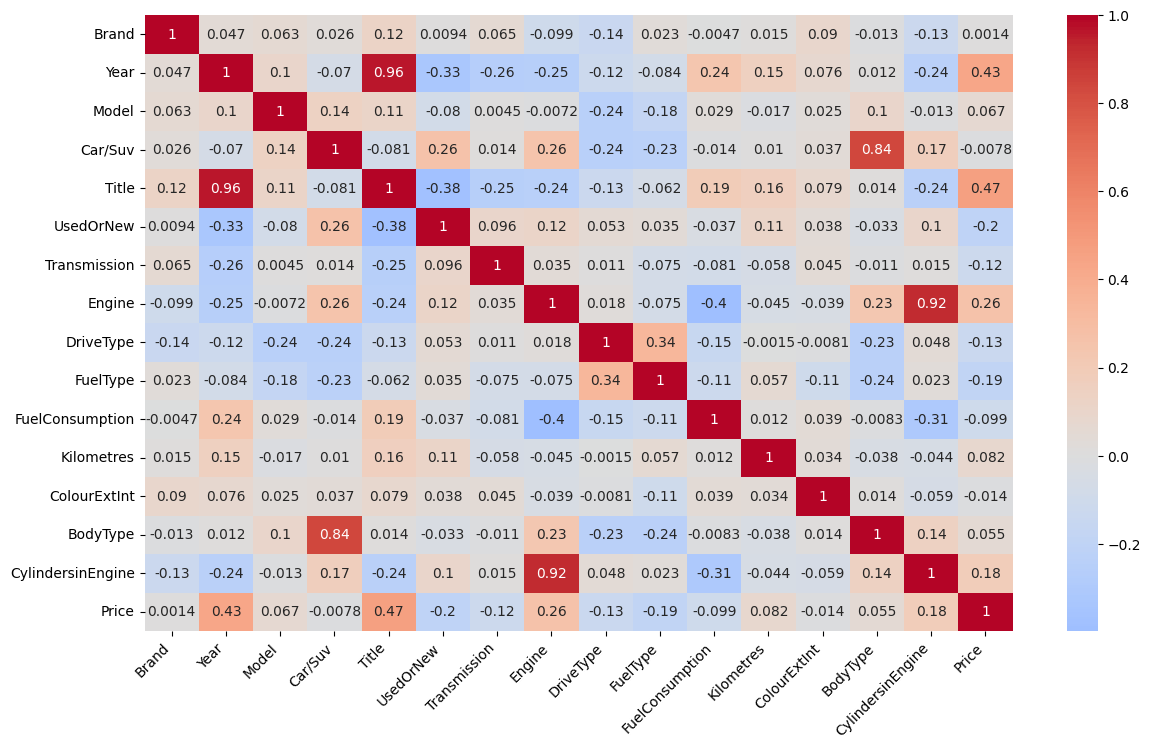

In [20]:
corr_matrix=ndf.corr()
plt.figure(1, figsize=(14,8))
sns.heatmap(corr_matrix,center=0, cmap ='coolwarm', annot=True)
plt.xticks(rotation=45, ha='right')
plt.show()

##特定欄位相關資訊

In [21]:
ndf[['Year','Brand']].value_counts() #計算出現次數

Year  Brand
2018  61       264
2019  61       262
2021  61       231
2020  61       208
2017  61       187
              ... 
2010  43         1
      28         1
      15         1
      9          1
2023  63         1
Length: 740, dtype: int64

In [22]:
len(df["Year"].unique())

39

<Axes: xlabel='Year'>

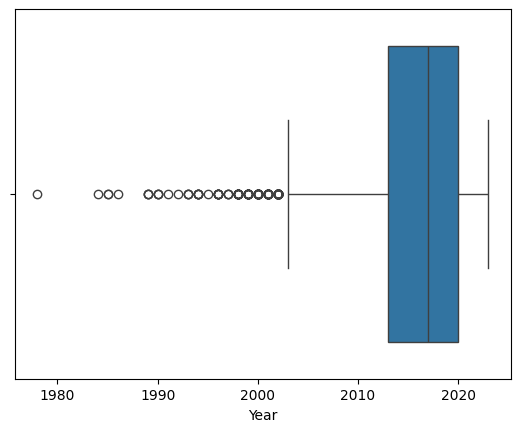

In [23]:
sns.boxplot(x= 'Year', data =ndf)

In [24]:
ndf['Brand'].unique()

array([56, 37,  4, 42, 51, 35, 45, 61, 25, 62, 17, 44, 57, 26, 31, 63, 40,
        0, 24,  3, 32, 43, 58, 48, 47, 28, 36, 30, 52, 54, 16, 23, 10, 33,
       22, 18, 38, 39, 19, 50, 60,  1, 20, 13,  9, 21, 46,  6, 15, 11,  8,
       34, 14, 41, 29,  7, 27,  5, 59,  2, 12, 53, 49, 55])

# **要把已轉成標籤的文字轉回失敗**

In [25]:
# original_data = lb.inverse_transform(ndf['Brand'])

ValueError: y contains previously unseen labels: [ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63]

<Axes: xlabel='Brand', ylabel='count'>

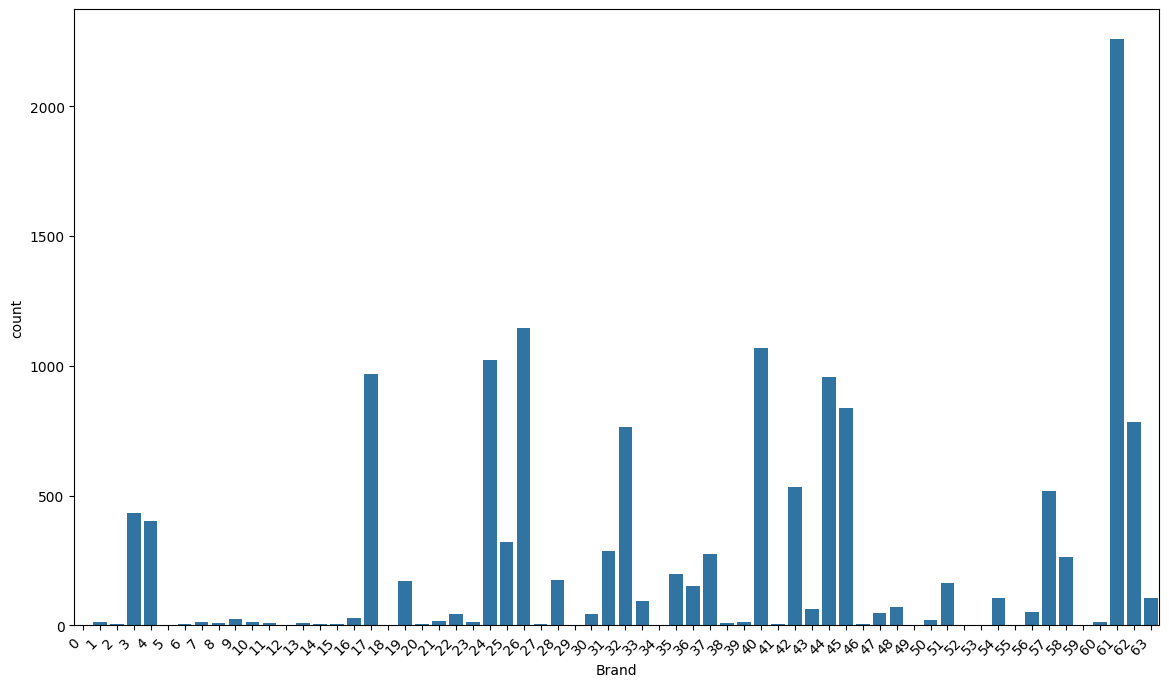

In [26]:
plt.figure(1, figsize=(14,8))
plt.xticks(rotation=45, ha='right')
sns.countplot(x='Brand', data=ndf)

In [27]:
ndf.loc[ndf['Brand']==61]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,BodyType,CylindersinEngine,Price
8,61,2013,79,60,2228,2,1,27,4,6,123,11540,16,2,5,24888.0
11,61,2018,340,56,4756,2,1,34,4,7,150,3490,639,0,5,41999.0
14,61,2016,340,56,3601,2,1,37,4,1,132,5798,639,0,5,27995.0
26,61,2005,175,189,379,2,1,31,2,7,150,984,482,7,5,8499.0
36,61,2021,203,85,6191,2,1,25,2,3,94,2186,16,3,5,44878.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16619,61,2018,377,188,4763,2,1,58,2,7,143,8850,27,6,7,46990.0
16646,61,2016,392,227,3621,2,2,75,0,1,18,3839,520,8,8,64990.0
16664,61,2008,641,85,851,2,2,20,2,7,112,7527,0,3,5,11990.0
16668,61,2005,175,189,379,2,1,53,2,7,8,4796,0,7,7,6900.0


In [28]:
ndf.loc[df['Brand']=='MG']

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,BodyType,CylindersinEngine,Price
1,37,2022,413,85,6482,2,1,22,2,6,119,3348,27,3,5,19990.0
286,37,2022,644,7,6485,0,1,22,2,7,123,2851,165,6,5,23690.0
390,37,2023,645,7,6897,1,1,22,2,0,121,2851,376,6,5,27690.0
455,37,2023,644,7,6896,1,1,22,2,0,123,2851,489,6,5,24690.0
477,37,2023,645,7,6898,1,1,15,2,0,125,2851,568,6,4,34990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16638,37,2022,338,188,6472,2,1,22,2,7,125,6730,27,6,5,27880.0
16648,37,2022,413,222,6480,1,1,22,2,6,119,3348,427,3,5,19990.0
16677,37,2020,338,188,5552,2,1,22,2,7,125,7069,520,6,5,34990.0
16699,37,2023,338,33,6890,1,1,27,1,0,147,2,568,6,5,40980.0


In [29]:
corr =ndf.corr()
corr.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'BodyType', 'CylindersinEngine', 'Price'],
      dtype='object')

##與廠牌相關度分析

In [30]:
corr['Brand'].sort_values(ascending = False)

Brand                1.000000
Title                0.124950
ColourExtInt         0.089813
Transmission         0.065049
Model                0.063367
Year                 0.046895
Car/Suv              0.025581
FuelType             0.022829
Kilometres           0.015266
UsedOrNew            0.009401
Price                0.001409
FuelConsumption     -0.004693
BodyType            -0.012923
Engine              -0.099179
CylindersinEngine   -0.127708
DriveType           -0.143706
Name: Brand, dtype: float64

<Axes: xlabel='Brand', ylabel='DriveType'>

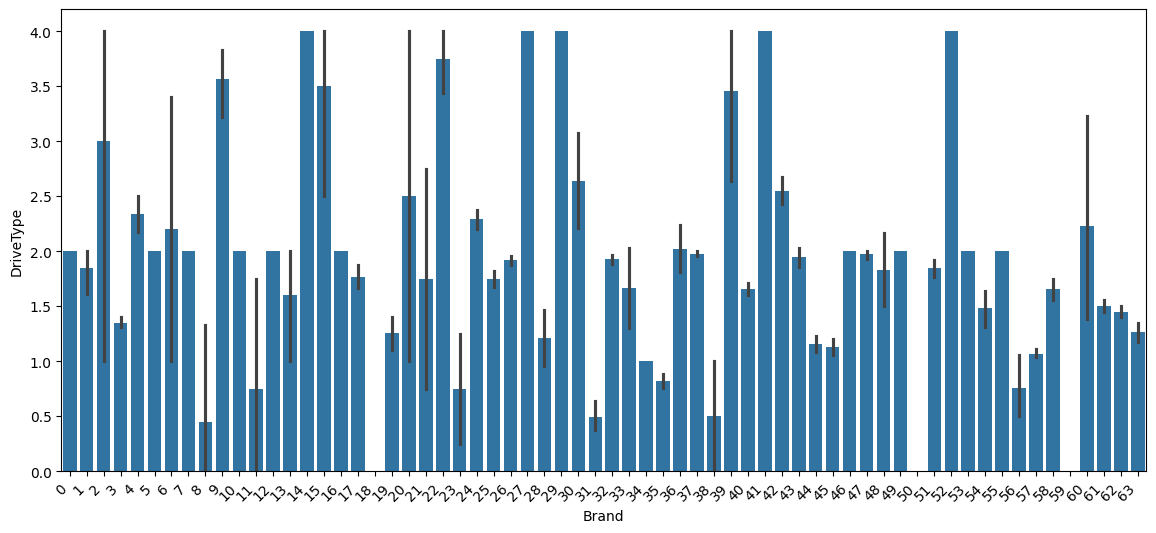

In [31]:
fig  = plt.figure(figsize=(14,6))
plt.xticks(rotation=45, ha='right')
sns.barplot(x = 'Brand', y = 'DriveType',  data = ndf)

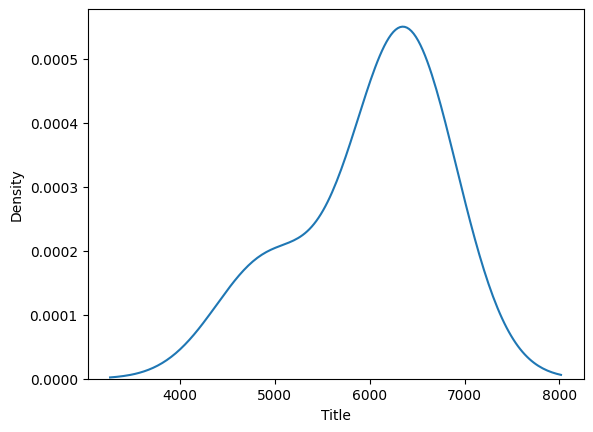

In [32]:
sns.kdeplot(ndf['Title'][ndf['Brand']==20])

for i in np.sort(df['Brand'].unique()) :
  sns.kdeplot(ndf['Title'][ndf['Brand']==i], \
      label = f'class={i:s}')

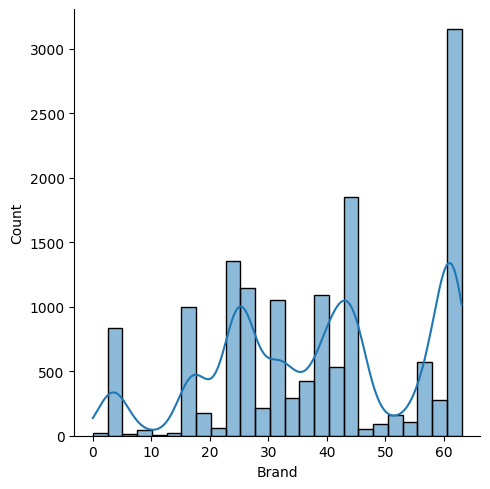

In [33]:
sns.displot(ndf['Brand'],kde =True)

<ipython-input-34-687219bf22aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ndf['Title'][ndf['Brand']==62], \


<Axes: xlabel='Title', ylabel='Density'>

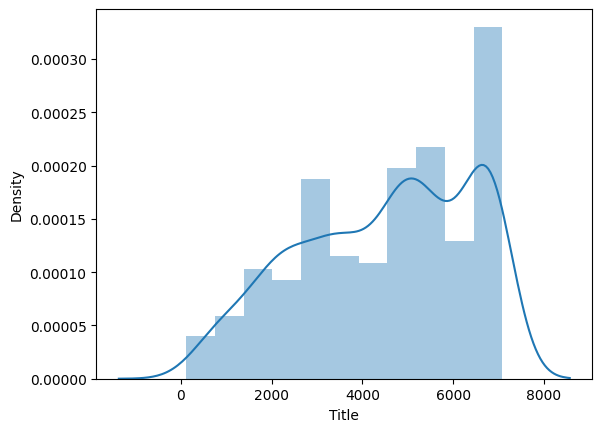

In [34]:
sns.distplot(ndf['Title'][ndf['Brand']==62], \
    label = f'class={i:s}')


In [35]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14551 entries, 0 to 16733
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14551 non-null  int64  
 1   Year               14551 non-null  int64  
 2   Model              14551 non-null  int64  
 3   Car/Suv            14551 non-null  int64  
 4   Title              14551 non-null  int64  
 5   UsedOrNew          14551 non-null  int64  
 6   Transmission       14551 non-null  int64  
 7   Engine             14551 non-null  int64  
 8   DriveType          14551 non-null  int64  
 9   FuelType           14551 non-null  int64  
 10  FuelConsumption    14551 non-null  int64  
 11  Kilometres         14551 non-null  int64  
 12  ColourExtInt       14551 non-null  int64  
 13  BodyType           14551 non-null  int64  
 14  CylindersinEngine  14551 non-null  int64  
 15  Price              14551 non-null  float64
dtypes: float64(1), int64(1

In [68]:
print(df_10_year)

       Brand  Year  Car/Suv  Transmission  FuelType  BodyType     Price
0         56  2022      202             1         1         6   51990.0
1         37  2022       85             1         6         3   19990.0
2          4  2022       60             1         6         2  108988.0
3         42  2011       60             1         6         2   32990.0
4         51  2022      188             1         7         6   34990.0
...      ...   ...      ...           ...       ...       ...       ...
16727     26  2015      234             1         7         9   21450.0
16728     45  2021      188             1         7         6   36770.0
16731     58  2022       30             1         7         6   35280.0
16732     42  2016      188             1         6         6   41888.0
16733     42  2021      189             1         7         7   65888.0

[14551 rows x 7 columns]


In [119]:
df_10_year = pd.get_dummies(df_10_year, columns=['Brand', 'Model', 'Car/Suv', 'Transmission', 'DriveType', 'FuelType', 'BodyType'])

In [133]:
print(df_10_year)

       Year  UsedOrNew    Price  Brand_0  Brand_1  Brand_2  Brand_3  Brand_4  \
11     2018          2  41999.0        0        0        0        0        1   
19     2014          2  12400.0        1        0        0        0        0   
21     2013          2  11999.0        1        0        0        0        0   
26     2005          2   8499.0        0        0        0        0        1   
28     2011          2  12990.0        0        1        0        0        0   
...     ...        ...      ...      ...      ...      ...      ...      ...   
16720  2020          2  32856.0        0        0        1        0        0   
16721  2016          2  12900.0        0        1        0        0        0   
16722  2016          2  13888.0        0        1        0        0        0   
16727  2015          2  21450.0        0        1        0        0        0   
16733  2021          2  65888.0        0        0        0        1        0   

       Model_0  Model_1  ...  FuelType_

In [154]:
# 分割資料為訓練集和測試集
X = df_10_year.drop('Brand_4', axis=1)
y = df_10_year['Brand_4']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
logimodel = LogisticRegression()
logimodel.fit(X_train, y_train)

LogisticRegression()

In [165]:
# 在測試集上進行預測
predictions = logimodel.predict_proba(X_test)[:, 1]

In [166]:
# 初始化準確率列表
accuracies = []

In [167]:
# 計算不同閾值下的準確率
thresholds = np.linspace(0, 1, 100)
for threshold in thresholds:
    # 將預測概率轉換為二元分類的預測結果
    binary_predictions = np.where(predictions >= threshold, 1, 0)
    # 計算準確率並將其添加到列表中
    accuracies.append(accuracy_score(y_test, binary_predictions))

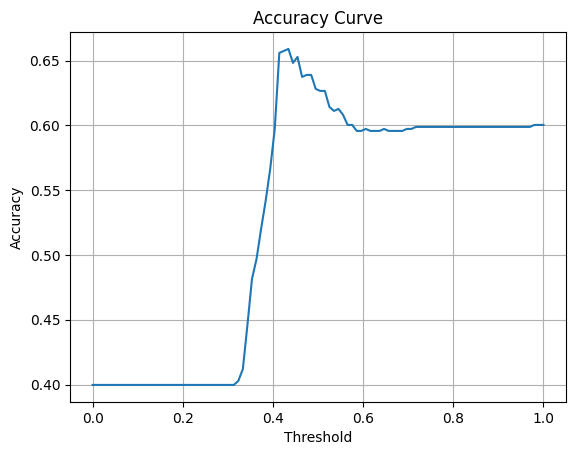

In [168]:
# 繪製準確率曲線
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.grid(True)
plt.show()

In [169]:
accuracy = logimodel.score(X_test, y_test)
print("模型準確率：", accuracy)

模型準確率： 0.6296296296296297


In [170]:
import xgboost as xgb
xgboot_model = xgb.XGBClassifier()
xgboot_model.fit(X_train, y_train)
y_pred = xgboot_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("準確率:", accuracy)


準確率: 1.0


In [173]:
from sklearn.metrics import r2_score
xgbpredictions = xgboot_model.predict(X_test)
logipredictions = logimodel.predict(X_test)
logir2 = r2_score(y_test, logipredictions)
xgbr2 = r2_score(y_test, xgbpredictions)


print("logic模型在測試集上的R2分數：", logir2)
print("xgboot模型在測試集上的R2分數：", xgbr2)

logic模型在測試集上的R2分數： -0.5436075076177904
xgboot模型在測試集上的R2分數： 1.0
